In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
nomes = pd.read_csv('yob.1880.txt',names=['nome','sexo','nascimentos'])

In [6]:
nomes


,nome,sexo,nascimentos
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [7]:
nomes.groupby('sexo').nascimentos.sum()

sexo
F     90993
M    110493
Name: nascimentos, dtype: int64

In [8]:
anos = range(1880, 2011)
partes = []
colunas = ['nome', 'sexo', 'nascimentos']

for ano in anos:
    caminho = 'yob.1880.txt'
    frame = pd.read_csv(caminho, names=colunas)
    
    frame['ano'] = ano
    partes.append(frame)
nomes = pd.concat(partes, ignore_index=True)

In [9]:
nomes

,nome,sexo,nascimentos,ano
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [10]:
total_nascimentos = nomes.pivot_table(index='nascimentos',
                                     columns='sexo', aggfunc=sum)
#total_nascimentos = nomes.pivot_table(index='nascimentos, columns='nome', aggfunc=sum)

In [11]:
total_nascimentos.tail()

ano          
sexo                F         M
nascimentos                    
5348              NaN  254795.0
5927              NaN  254795.0
7065         254795.0       NaN
9533              NaN  254795.0
9655              NaN  254795.0

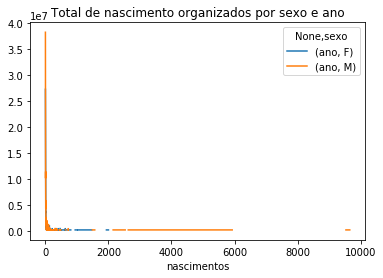

In [12]:
total_nascimentos.plot(title='Total de nascimento organizados por sexo e ano')

In [13]:
def add_prop(grupo):
    nascimentos = grupo.nascimentos.astype(float)
    
    grupo['prop'] = nascimentos / nascimentos.sum()
    return grupo
nomes = nomes.groupby(['ano','sexo']).apply(add_prop)

In [14]:
nomes


,nome,sexo,nascimentos,ano,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [15]:
np.allclose(nomes.groupby(['ano', 'sexo']).prop.sum(),1)

True

In [16]:
def get_top1000(grupo):
    return grupo.sort_values(by='nascimentos', ascending=False)[:1000]
    
gruped = nomes.groupby(['ano', 'sexo'])
top1000 = gruped.apply(get_top1000)

In [17]:
top1000


nome sexo  nascimentos   ano      prop
ano  sexo                                                    
1880 F    0            Mary    F         7065  1880  0.077643
          1            Anna    F         2604  1880  0.028618
          2            Emma    F         2003  1880  0.022013
          3       Elizabeth    F         1939  1880  0.021309
          4          Minnie    F         1746  1880  0.019188
          5        Margaret    F         1578  1880  0.017342
          6             Ida    F         1472  1880  0.016177
          7           Alice    F         1414  1880  0.015540
          8          Bertha    F         1320  1880  0.014507
          9           Sarah    F         1288  1880  0.014155
          10          Annie    F         1258  1880  0.013825
          11          Clara    F         1226  1880  0.013474
          12           Ella    F         1156  1880  0.012704
          13       Florence    F         1063  1880  0.011682
          14           Cora    F         1045  1880  0.011484
          15         Martha    F         1040  1880  0.011429
          16          Laura    F         1012  1880  0.011122
          17         Nellie    F          995  1880  0.010935
          18          Grace    F          982  1880  0.010792
          19         Carrie    F          949  1880  0.010429
          20          Maude    F          858  1880  0.009429
          21          Mabel    F          808  1880  0.008880
          22         Bessie    F          794  1880  0.008726
          23         Jennie    F          793  1880  0.008715
          24       Gertrude    F          787  1880  0.008649
          25          Julia    F          783  1880  0.008605
          26         Hattie    F          769  1880  0.008451
          27          Edith    F          768  1880  0.008440
          28         Mattie    F          704  1880  0.007737
          29           Rose    F          700  1880  0.007693
...                     ...  ...          ...   ...       ...
2010 M    261969     Payton    M            5  2010  0.000045
          261970      Philo    M            5  2010  0.000045
          261971    Phineas    M            5  2010  0.000045
          261972    Presley    M            5  2010  0.000045
          261973     Ransom    M            5  2010  0.000045
          261974      Reece    M            5  2010  0.000045
          261975       Rene    M            5  2010  0.000045
          261976    Roswell    M            5  2010  0.000045
          261977    Rowland    M            5  2010  0.000045
          261978    Sampson    M            5  2010  0.000045
          261979     Samual    M            5  2010  0.000045
          261926      Irven    M            5  2010  0.000045
          261859      Ashby    M            5  2010  0.000045
          261924       Hunt    M            5  2010  0.000045
          261868     Blaine    M            5  2010  0.000045
          261870       Brad    M            5  2010  0.000045
          261871   Bradford    M            5  2010  0.000045
          261872    Bradley    M            5  2010  0.000045
          261873     Brooks    M            5  2010  0.000045
          261874       Buck    M            5  2010  0.000045
          261875       Budd    M            5  2010  0.000045
          261876     Ceylon    M            5  2010  0.000045
          261877   Chalmers    M            5  2010  0.000045
          261878    Chesley    M            5  2010  0.000045
          261879       Chin    M            5  2010  0.000045
          261880       Cleo    M            5  2010  0.000045
          261881   Crockett    M            5  2010  0.000045
          261882      Cyril    M            5  2010  0.000045
          261883      Daisy    M            5  2010  0.000045
          261884     Denver    M            5  2010  0.000045

[254402 rows x 5 columns]

In [24]:
garotos = top1000[top1000.sexo == 'M']
garotas = top1000[top1000.sexo == 'F']

total_nascimentos = top1000.pivot_table('nascimentos', index='ano', columns='nome',
                                       aggfunc=sum)

/home/filipanselmo/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:82: FutureWarning: 'ano' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)


In [25]:
total_nascimentos

nome,Aaron,Abbie,Abby,Abe,Abel,Abigail,Abner,Abraham,Abram,Ada,...,Zelma,Zena,Zetta,Zilpha,Zoa,Zoe,Zola,Zona,Zora,Zula
ano,,,,,,,,,,,,,,,,,,,,,
1880,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1881,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1882,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1883,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1884,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1885,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1886,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1887,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27
1888,102,71,6,50,9,12,27,81,21,652,...,19,7,8,6,8,23,7,8,28,27


In [30]:
#subset = total_nascimentos[['Jonh', 'Harry', 'Mary', 'Marilyn']]
#subset.plot(subplots=True, figsize=(12, 10), grid=False,
           #title="Numero de nascimentos por ano")

/home/filipanselmo/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:82: FutureWarning: 'ano' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)
/home/filipanselmo/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:82: FutureWarning: 'sexo' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)


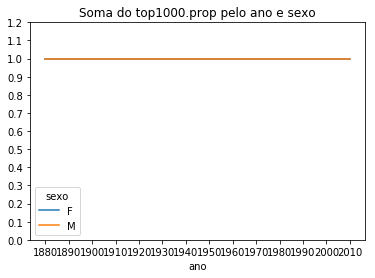

In [31]:
table = top1000.pivot_table('prop', index='ano',
                           columns='sexo', aggfunc=sum)

table.plot(title='Soma do top1000.prop pelo ano e sexo',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [32]:
df = garotos[garotos.ano == 2010]
df

nome sexo  nascimentos   ano      prop
ano  sexo                                                   
2010 M    260942      John    M         9655  2010  0.087381
          260943   William    M         9533  2010  0.086277
          260944     James    M         5927  2010  0.053641
          260945   Charles    M         5348  2010  0.048401
          260946    George    M         5126  2010  0.046392
          260947     Frank    M         3242  2010  0.029341
          260948    Joseph    M         2632  2010  0.023821
          260949    Thomas    M         2534  2010  0.022934
          260950     Henry    M         2444  2010  0.022119
          260951    Robert    M         2416  2010  0.021866
          260952    Edward    M         2364  2010  0.021395
          260953     Harry    M         2152  2010  0.019476
          260954    Walter    M         1755  2010  0.015883
          260955    Arthur    M         1599  2010  0.014472
          260956      Fred    M         1569  2010  0.014200
          260957    Albert    M         1493  2010  0.013512
          260958    Samuel    M         1024  2010  0.009268
          260959     David    M          869  2010  0.007865
          260960     Louis    M          828  2010  0.007494
          260961       Joe    M          731  2010  0.006616
          260962   Charlie    M          730  2010  0.006607
          260963  Clarence    M          730  2010  0.006607
          260964   Richard    M          728  2010  0.006589
          260965    Andrew    M          644  2010  0.005828
          260966    Daniel    M          643  2010  0.005819
          260967    Ernest    M          615  2010  0.005566
          260968      Will    M          588  2010  0.005322
          260969     Jesse    M          569  2010  0.005150
          260970     Oscar    M          544  2010  0.004923
          260971     Lewis    M          517  2010  0.004679
...                    ...  ...          ...   ...       ...
          261969    Payton    M            5  2010  0.000045
          261970     Philo    M            5  2010  0.000045
          261971   Phineas    M            5  2010  0.000045
          261972   Presley    M            5  2010  0.000045
          261973    Ransom    M            5  2010  0.000045
          261974     Reece    M            5  2010  0.000045
          261975      Rene    M            5  2010  0.000045
          261976   Roswell    M            5  2010  0.000045
          261977   Rowland    M            5  2010  0.000045
          261978   Sampson    M            5  2010  0.000045
          261979    Samual    M            5  2010  0.000045
          261926     Irven    M            5  2010  0.000045
          261859     Ashby    M            5  2010  0.000045
          261924      Hunt    M            5  2010  0.000045
          261868    Blaine    M            5  2010  0.000045
          261870      Brad    M            5  2010  0.000045
          261871  Bradford    M            5  2010  0.000045
          261872   Bradley    M            5  2010  0.000045
          261873    Brooks    M            5  2010  0.000045
          261874      Buck    M            5  2010  0.000045
          261875      Budd    M            5  2010  0.000045
          261876    Ceylon    M            5  2010  0.000045
          261877  Chalmers    M            5  2010  0.000045
          261878   Chesley    M            5  2010  0.000045
          261879      Chin    M            5  2010  0.000045
          261880      Cleo    M            5  2010  0.000045
          261881  Crockett    M            5  2010  0.000045
          261882     Cyril    M            5  2010  0.000045
          261883     Daisy    M            5  2010  0.000045
          261884    Denver    M            5  2010  0.000045

[1000 rows x 5 columns]

In [37]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

prop_cumsum[:10]

ano   sexo       
1900  M     40942    0.087381
            40943    0.173658
            40944    0.227299
            40945    0.275701
            40946    0.322093
            40947    0.351434
            40948    0.375255
            40949    0.398188
            40950    0.420307
            40951    0.442173
Name: prop, dtype: float64

In [34]:
prop_cumsum.searchsorted(0.5)

array([13])

In [35]:
df = garotos[garotos.ano == 1900]


In [38]:
em1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [39]:
em1990.searchsorted(0.5) + 1

array([14])

In [40]:
def get_quantile_count(grupo, q=0.5):
    grupo = grupo.sort_values(by='prop', ascending=False)
    return grupo.prop.cumsum().searchsorted(q) + 1

In [41]:
diversidade = top1000.groupby(['ano', 'sexo']).apply(get_quantile_count)
diversidade = diversidade.unstack('sexo')

/home/filipanselmo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'ano' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/home/filipanselmo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'sexo' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [42]:
diversidade.head()

sexo,F,M
ano,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[14]
1883,[38],[14]
1884,[38],[14]


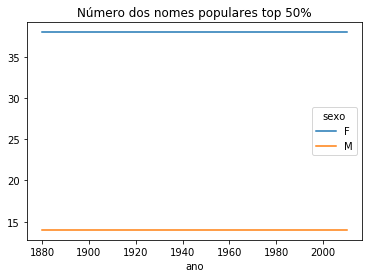

In [44]:
diversidade = diversidade.astype(float)
diversidade.plot(title='Número dos nomes populares top 50%')

In [45]:
#Extrair a ultima letra da coluna nome
get_last_letter = lambda x: x[-1]
last_letters = nomes.nome.map(get_last_letter)
last_letters.nomes = 'last_letter'

In [46]:
table = nomes.pivot_table('nascimentos', index=last_letters,
                         columns=['sexo','ano'], aggfunc=sum)

In [47]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='ano')
subtable.head()

sexo        F                          M                  
ano      1910     1960     2010     1910     1960     2010
nome                                                      
a     31446.0  31446.0  31446.0    776.0    776.0    776.0
b         NaN      NaN      NaN    509.0    509.0    509.0
c         NaN      NaN      NaN    349.0    349.0    349.0
d       609.0    609.0    609.0   9177.0   9177.0   9177.0
e     33378.0  33378.0  33378.0  13493.0  13493.0  13493.0

In [48]:
subtable.sum()

sexo  ano 
F     1910     90993.0
      1960     90993.0
      2010     90993.0
M     1910    110493.0
      1960    110493.0
      2010    110493.0
dtype: float64

In [49]:
letter_prop = subtable / subtable.sum().astype(float)

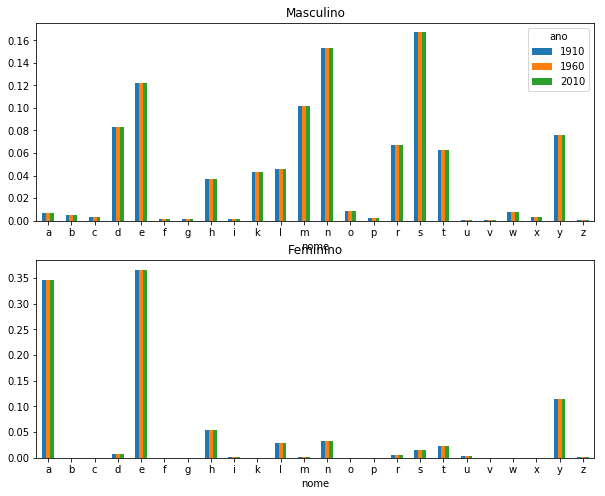

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Masculino')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Feminino',
                     legend=False)

In [51]:
letter_prop = table / table.sum().astype(float)

In [53]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

nome,d,n,y
ano,,,
1880,0.083055,0.153213,0.07576
1881,0.083055,0.153213,0.07576
1882,0.083055,0.153213,0.07576
1883,0.083055,0.153213,0.07576
1884,0.083055,0.153213,0.07576


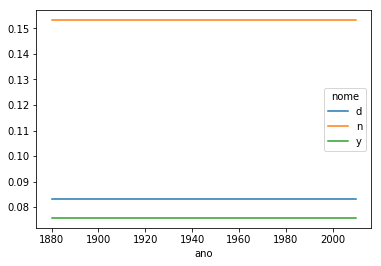

In [54]:
dny_ts.plot()

In [57]:
all_names = top1000.nome.unique()

In [58]:
mask = np.array(['lesl' in x.lower() for x in all_names])


In [59]:
lesley_like = all_names[mask]
lesley_like

array(['Leslie'], dtype=object)

In [61]:
filtered = top1000[top1000.nome.isin(lesley_like)]

In [63]:
filtered.groupby('nome').nascimentos.sum()

nome
Leslie    11397
Name: nascimentos, dtype: int64

In [64]:
table = filtered.pivot_table('nascimentos', index='ano',
                            columns='sexo', aggfunc=sum)

/home/filipanselmo/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:82: FutureWarning: 'ano' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)
/home/filipanselmo/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:82: FutureWarning: 'sexo' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)


In [65]:
table = table.div(table.sum(1), axis=0)
table.tail()

sexo,F,M
ano,,
2006,0.091954,0.908046
2007,0.091954,0.908046
2008,0.091954,0.908046
2009,0.091954,0.908046
2010,0.091954,0.908046


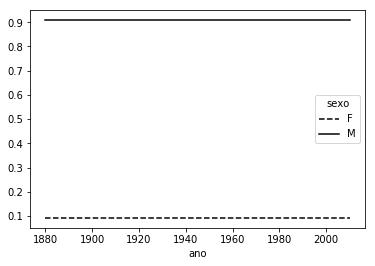

In [66]:
table.plot(style={'M': 'k-', 'F': 'k--'})